In [1]:
import numpy as np
import readgadget
import readfof
import redshift_space_library as RSL

ModuleNotFoundError: No module named 'readgadget'

In [2]:
snapdir = '/home/fdavilakurban/mnt/clemente/quijote/Halos/FoF/fiducial/0/' #folder hosting the catalogue
snapnum = 4                                      #number of the catalog (4-->z=0, 3-->z=0.5, 2-->z=1, 1-->z=2, 0-->z=3)

In [7]:
# get the name of the corresponding snapshot
snapshot = '/home/fdavilakurban/mnt/clemente/quijote/Snapshots/fiducial/0/snapdir_%03d/snap_%03d'%(snapnum,snapnum)

# read the redshift, boxsize, cosmology...etc in the header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

print('BoxSize = %.3f Mpc/h'%BoxSize)
print('Number of particles in the snapshot:',Nall)
print('Omega_m = %.3f'%Omega_m)
print('Omega_l = %.3f'%Omega_l)
print('h = %.3f'%h)
print('redshift = %.1f'%redshift)

BoxSize = 1000.000 Mpc/h
Number of particles in the snapshot: [        0 134217728         0         0         0         0]
Omega_m = 0.318
Omega_l = 0.682
h = 0.671
redshift = 0.0


In [3]:
# read the halo catalogue
FoF = readfof.FoF_catalog(snapdir, snapnum, long_ids=False,
                          swap=False, SFR=False, read_IDs=False)

# get the properties of the halos
pos_h  = FoF.GroupPos/1e3            #Halo positions in Mpc/h
vel_h  = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s
mass_h = FoF.GroupMass*1e10          #Halo masses in Msun/h
Np_h   = FoF.GroupLen                #Number of CDM particles in the halo. Even in simulations with massive neutrinos, this will be just the number of CDM particles


NameError: name 'redshift' is not defined

In [9]:
print('%.3f < X_h  < %.3f Mpc/h'%(np.min(pos_h[:,0]), np.max(pos_h[:,0])))
print('%.3f < Y_h  < %.3f Mpc/h'%(np.min(pos_h[:,1]), np.max(pos_h[:,1])))
print('%.3f < Z_h  < %.3f Mpc/h'%(np.min(pos_h[:,2]), np.max(pos_h[:,2])))
print('%.3f < Vx_h < %.3f km/s'%(np.min(vel_h[:,0]), np.max(vel_h[:,0])))
print('%.3f < Vy_h < %.3f km/s'%(np.min(vel_h[:,1]), np.max(vel_h[:,1])))
print('%.3f < Vz_h < %.3f km/s'%(np.min(vel_h[:,2]), np.max(vel_h[:,2])))
print('%.3e < M_h < %.3e Msun/h'%(np.min(mass_h), np.max(mass_h)))
print('%d < Np < %d'%(np.min(Np_h), np.max(Np_h)))

0.000 < X_h  < 999.996 Mpc/h
0.006 < Y_h  < 999.996 Mpc/h
0.002 < Z_h  < 999.997 Mpc/h
-2123.249 < Vx_h < 1889.825 km/s
-1771.374 < Vy_h < 1946.078 km/s
-1787.578 < Vz_h < 1938.839 km/s
1.313e+13 < M_h < 5.470e+15 Msun/h
20 < Np < 8332


In [10]:
Minimum_mass = 20*Masses[1] #This is 20 times the mass of a single DM particle
print('%.3e should be equal to\n%.3e'%(Minimum_mass, np.min(mass_h)))

1.313e+13 should be equal to
1.313e+13


In [11]:
index = 45 #the index of the halo
print('Halo position:',pos_h[index],'Mpc/h')
print('Halo velocity:',vel_h[index],'km/s')
print('Halo mass: %.3e Msun/h'%mass_h[index])
print('Number of particles in the halo: %d'%Np_h[index])

Halo position: [619.1276  248.06894 407.3931 ] Mpc/h
Halo velocity: [-144.77057   379.85696   105.642654] km/s
Halo mass: 1.846e+15 Msun/h
Number of particles in the halo: 2812


In [12]:
# move halos to redshift-space. After this call, pos_h will contain the
# positions of the halos in redshift-space
axis = 0 #axis along which to displace halos
RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

In [13]:
min_mass = 2e13 #minimum mass in Msun/h
max_mass = 1e15 #maximum mass in Msun/h
bins     = 30   #number of bins in the HMF

# Correct the masses of the FoF halos
mass_h = mass_h*(1.0-Np_h**(-0.6))

bins_mass = np.logspace(np.log10(min_mass), np.log10(max_mass), bins+1)
mass_mean = 10**(0.5*(np.log10(bins_mass[1:])+np.log10(bins_mass[:-1])))
dM        = bins_mass[1:] - bins_mass[:-1]

# compute the halo mass function (number of halos per unit volume per unit mass)
HMF = np.histogram(mass_h, bins=bins_mass)[0]/(dM*BoxSize**3)

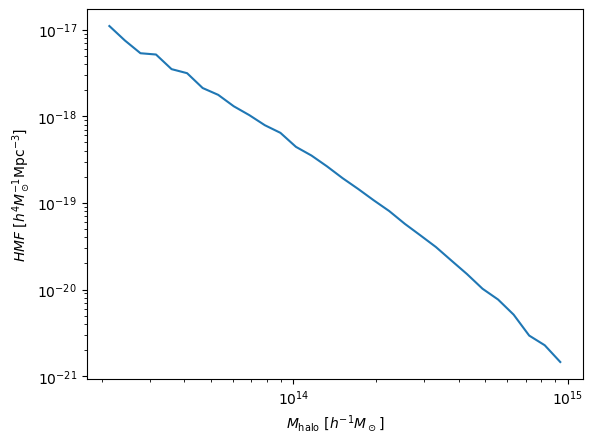

In [14]:
import matplotlib.pyplot as plt
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\rm halo}~[h^{-1}M_\odot]$')
plt.ylabel(r'$HMF~[h^4M_\odot^{-1}{\rm Mpc}^{-3}]$')
plt.plot(mass_mean, HMF)
plt.show()

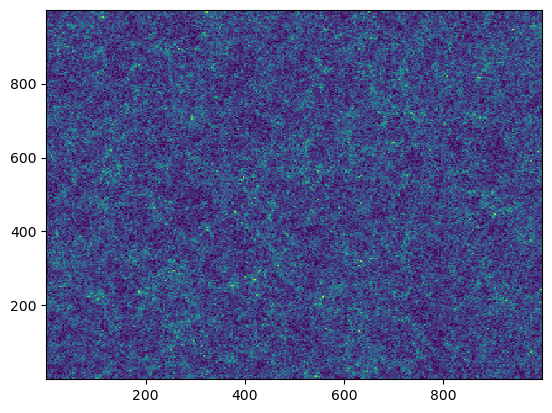

In [15]:
plt.hist2d(pos_h[:,0],pos_h[:,1],300)
plt.show()

In [16]:
len(pos_h)

406660

In [21]:
msep = (1000.**3/len(pos_h))**(1./3)
print('Mean interparticle distance: %.1fMpc'%msep)

Mean interparticle distance: 13.5Mpc
